In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from itertools import combinations
import os
import time
from scipy import stats
from tqdm import tqdm
import scipy as sp
from igraph import Graph
import pandas as pd
import graph_tool as gt


params = {
'font.size' : 16,
'axes.labelsize':16,
'legend.fontsize': 14,
'xtick.labelsize': 14,
'ytick.labelsize': 14,
}

plt.rcParams.update(params)



def BA_me(m_,N_):
    nodes = [x for x in range(1,m_+1)]
    edges = list(combinations(nodes,2))
    t = 0 
    
    n = m_
    
    while len(nodes) < N_:
        new_node = n + 1
        nodes.append(new_node)
        not_allowed = [new_node]
        i=0
        while i < m_:
            edge_choice = random.choice(edges)
            node_choice = edge_choice[random.choice([0,1])]
            if node_choice in not_allowed:
                #print('Connection from ', new_node,' to ', node_choice,'\nnot allowed.')
                continue
            else:
                not_allowed.append(node_choice)
                edges.append((new_node,node_choice))
                i+=1
        n+=1
        t+=1
    nodes, degrees = np.unique(edges,return_counts=True)
    print('mean degree is ',np.mean(degrees))
    return nodes, edges#, degrees

def BA_netx(m_,N_):
    G = nx.barabasi_albert_graph(N_,m_)
    return G

def BA_ig(m_,N_):
    return Graph.Barabasi(N_,m_)

m, N = 3, 4000

start_me = time.time()
n,e = BA_me(m,N)
end_me = time.time()

start_netx = time.time()
G = BA_netx(m,N)
end_netx = time.time()

start_igraph = time.time()
G1 = BA_ig(m,N)
end_igraph = time.time()

start_gt = time.time()
G2 = gt.generation.price_network(N,m,directed=False)
end_gt = time.time()



m,N = 3, 4000

print("Networkx Time = ",end_netx-start_netx)
print("my Code Time = ", end_me-start_me)
print("iGraph Time = ", end_igraph-start_igraph)
print("graph-tool Time = ", end_gt-start_gt)

start_close_netx = time.time()
#closeness = [close for (node,close) in kx.closeness_centrality(G)]
degrees = [val for (node, val) in G.degree()]
unique_degrees = np.unique(degrees)
inv_close = 1/np.asarray(list(nx.closeness_centrality(G).values()))
#print(len(degrees),len(inv_close))
end_close_netx = time.time()


start_close_igraph = time.time()
degrees2 = G1.degree()
inv_close2 = 1/np.asarray(G1.closeness())
print(len(degrees2),len(inv_close2))
end_close_igraph = time.time()

start_close_gt = time.time()
degrees3 = G2.get_total_degrees(G2.get_vertices())
inv_close3 = gt.centrality.closeness(G2).get_array()
print(len(degrees3),len(inv_close3))
end_close_gt = time.time()


print("Networkx closeness time: ",end_close_netx-start_close_netx)
print("iGraph closeness time: ",end_close_igraph-start_close_igraph)
print("graph-tool closeness time: ",end_close_gt-start_close_gt)
print(gt.openmp_enabled())
print(gt.openmp_get_num_threads())

mean degree is  5.997
Networkx Time =  0.033290863037109375
my Code Time =  0.04717373847961426
iGraph Time =  0.0037615299224853516
graph-tool Time =  0.0070171356201171875
4000 4000
4000 4000
Networkx closeness time:  19.182042121887207
iGraph closeness time:  0.8461849689483643
graph-tool closeness time:  1.0825588703155518
True
4


/tmp/ipykernel_27880/3972299435.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_new,ignore_index=True)


mean k is  13.571428571428571


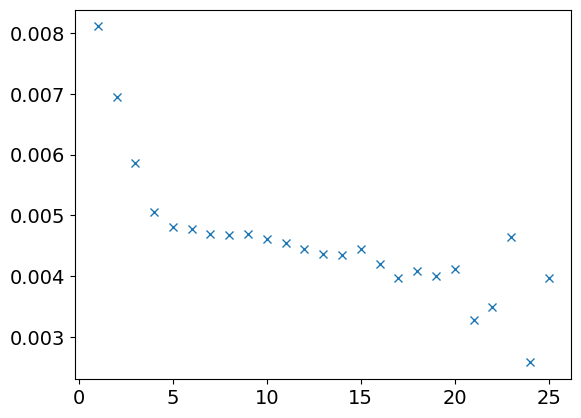

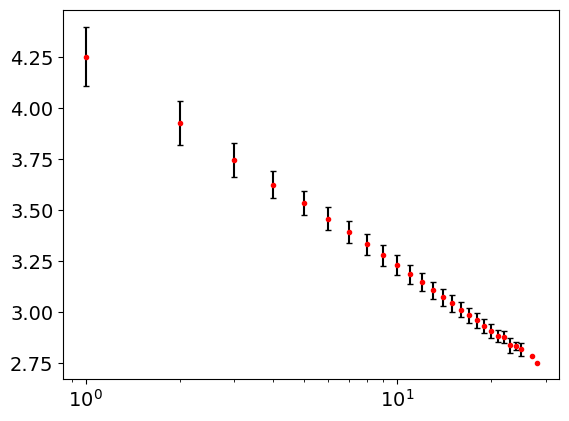

[[nan nan]
 [nan  1.]]


NameError: name 'opt' is not defined

In [3]:
from scipy import stats
from scipy import optimize

def BA_closeVSdeg(m_,N_, its, plot=False):
  df = pd.DataFrame({"k":[],"c":[]})
  for i in range(its):
    G = Graph.Erdos_Renyi(n=1000,p=0.01)
    degrees = G.degree()
    #print(np.mean(degrees))
    close = np.asarray(G.closeness())
    #print(len(degrees),len(inv_close))
    df_new = pd.DataFrame({"k":degrees,"c":close})
    #print(df_new.head())
    df = df.append(df_new,ignore_index=True)
  #print(df.head())
  df = df.groupby("k").agg({"c":['mean','std']})
  df = df.xs('c', axis=1, drop_level=True)
  df = df.reset_index('k')
  df = df.rename(columns={"mean":"mean c","std":"std c"})

  ks = df.loc[:,"k"].tolist()
  print('mean k is ' ,np.mean(ks)) 
  cs = np.asarray(df.loc[:,"mean c"].tolist())
  cs_err = np.asarray(df.loc[:,"std c"].tolist())
  plt.plot(ks,cs_err,'x')
  inv_c = 1/cs
  inv_c_err = cs_err/np.square(cs)
  
  if plot:
    plt.figure()
    plt.errorbar(ks,inv_c,yerr=inv_c_err,fmt='none',ecolor='black',capsize=2)
    plt.plot(ks,inv_c,'r.')
    plt.xscale("log")
    plt.show()  
  return ks, inv_c, inv_c_err, cs

kss, inv_cs, err, cs = BA_closeVSdeg(5,4000,100,True)

pc= np.corrcoef(cs, kss)
print(pc)

def analytic(k,a,b):
  return -a*np.log(k)+b

#opt, pcov = optimize.curve_fit(analytic,kss,inv_cs,p0=[0.3,3.5])

print(opt)
print(pcov)
#print(inv_cs)
#print(err)